* on Win paths are written using `\` as a separator 
* on Mac we us `/` 
* if you want your programs to work everywhere you need to handle both cases
* **Good news** is the `os` modules makes it happen seamlessly based on the `os` you are on

In [9]:
from faker import Faker

In [10]:
fake = Faker()

In [71]:
import os
import shutil

In [6]:
os.path.join('usr', 'bin', 'spam')
#if this was windows it would separate by `\\` 
# `\` needs to be escaped - in this case `\` happens
# to be a special character, so if used in a script
# it won't confuse python (think =)

'usr/bin/spam'

* `os.path.join()` is helpful if you need to create strings for filenames
* we will use this function to create file strings and pass to functions
* for example

In [7]:
my_files = ['accounts.txt', 'details.csv', 'invite.docx']

In [9]:
my_files

['accounts.txt', 'details.csv', 'invite.docx']

In [10]:
for filename in my_files:
    print(os.path.join('/Users/timdennis/Desktop/', filename))

/Users/timdennis/Desktop/accounts.txt
/Users/timdennis/Desktop/details.csv
/Users/timdennis/Desktop/invite.docx


### Current working dir

* we can use `os` module to get current working directory

In [12]:
os.getcwd()

'/Users/timdennis/lessons/py-mass-useful'

* we can change our working directory by using `os.chrdir()` with the path quoted
* Why is the path quoted? 

In [16]:
os.chdir('/Users/timdennis/Desktop/')

* let's confirm that it changed by using `os.getcwd()`

In [17]:
os.getcwd()

'/Users/timdennis/Desktop'

* python will throw an error if try to change to a dir that doesn't exist

In [18]:
os.chdir('/Users/nodir')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nodir'

### Relative and absolute

In [22]:
os.chdir('/Users/timdennis/lessons/py-mass-useful')

![directories and paths](images/file-structure.png)

### Creating folders 

* we can create new directories
* we'll use `os.makedirs()`

In [23]:
os.getcwd()

'/Users/timdennis/lessons/py-mass-useful'

* I'm going to put this on my Desktop so I won't forget it

In [24]:
os.chdir('/Users/timdennis/Desktop/')

* We can make derectories using `os.makedirs()`
* Let's make one up for fun and then clean up our working space. 

In [25]:
os.makedirs("/Users/timdennis/Desktop/delicious/walnut/waffles")

* What do you think it did? 
* This will create not just `delicious`, but `walnut` inside `delicious` and a `waffles` inside `delicious/walnut`
* Go to finder to show
* Now lets move stuff into it - here we'll use the shutil module, which provides a funciton for copying files and folders

In [72]:
os.getcwd()

'/Users/timdennis/lessons/py-mass-useful'

In [73]:
shutil.copy('data/01-combined/2018-01-06-report.csv', '/Users/timdennis/Desktop/delicious/walnut/waffles/')

'/Users/timdennis/Desktop/delicious/walnut/waffles/2018-01-06-report.csv'

* We can also rename when we copy
* Here's how:

In [74]:
shutil.copy('data/01-combined/2018-01-06-report.csv', '/Users/timdennis/Desktop/delicious/walnut/waffles/2018-report.csv')

'/Users/timdennis/Desktop/delicious/walnut/waffles/2018-report.csv'

### Remember these, we'll come back to this later

### Combining a bunch of CSVs, but grabbing parts of the file for a column

* A common case is that we are given or create a bunch of CSV files by a date 
* They are the same shape (same columns and rows)
* We want to combine them together, but add a column that retains the year, month, and day 
* How do you think we can do this? What Python programming tools will we use? 

In [13]:
!ls data # our data

2018-01-06-report.csv       2018-02-26-report.csv
2018-01-09-report.csv       2018-02-27-report.csv
2018-01-10-report.csv       2018-03-04-report.csv
2018-01-15-report.csv       2018-03-18-report.csv
2018-01-30-report.csv       2018-04-03-report.csv
2018-02-01-report.csv       2018-04-04-report.csv
2018-02-03-report.csv       2018-04-08-report.csv
2018-02-04-report.csv       2018-04-19-report.csv
2018-02-11-report.csv       2018-04-20-report.csv
2018-02-12-report.csv       automate_online-materials 2
2018-02-22-report.csv


* We need a python module that will look into a directory and return a list of files
* Remember `glob.glob` from last quarter? 
* IT RETURNS!

In [14]:
import glob

In [5]:
glob.glob('data/*.csv')

['data/2018-01-06-report.csv',
 'data/2018-01-09-report.csv',
 'data/2018-01-10-report.csv',
 'data/2018-01-15-report.csv',
 'data/2018-01-30-report.csv',
 'data/2018-02-01-report.csv',
 'data/2018-02-03-report.csv',
 'data/2018-02-04-report.csv',
 'data/2018-02-11-report.csv',
 'data/2018-02-12-report.csv',
 'data/2018-02-22-report.csv',
 'data/2018-02-26-report.csv',
 'data/2018-02-27-report.csv',
 'data/2018-03-04-report.csv',
 'data/2018-03-18-report.csv',
 'data/2018-04-03-report.csv',
 'data/2018-04-04-report.csv',
 'data/2018-04-08-report.csv',
 'data/2018-04-19-report.csv',
 'data/2018-04-20-report.csv']

* What's happening here is that it goes inside the data/ directory and grabs the filenames that have the `.csv` extension
* Glob then will return us a list of those files
* What does `*` do above? 
* Now we need to go through those files in the list and apply a function to them
* What do we use? 
* Yes, a loop - we'll start by printing out the name

In [15]:
for file in glob.glob('data/*.csv'):
    print(file)

data/2018-01-06-report.csv
data/2018-01-09-report.csv
data/2018-01-10-report.csv
data/2018-01-15-report.csv
data/2018-01-30-report.csv
data/2018-02-01-report.csv
data/2018-02-03-report.csv
data/2018-02-04-report.csv
data/2018-02-11-report.csv
data/2018-02-12-report.csv
data/2018-02-22-report.csv
data/2018-02-26-report.csv
data/2018-02-27-report.csv
data/2018-03-04-report.csv
data/2018-03-18-report.csv
data/2018-04-03-report.csv
data/2018-04-04-report.csv
data/2018-04-08-report.csv
data/2018-04-19-report.csv
data/2018-04-20-report.csv


* Now, let's look at the filenames: `data/2018-03-18-report.csv` 
* How are the different elements of the file name separated? 
* What do we want to do to these filenames to use the parts? 
* Hint: `split()` is a function that is apart of the built-in `str` class (every character string we use in python inherits from `str`. We can get help by running `help(str.split)`
* The `split()` function can help

In [27]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



* What're the possible delimiter in our list of files? 
    * `.`
    * `2018`
    * `-`
    * Anything in the string

* What delimiter do we need to use to get what we want? 


In [28]:
'tim-dennis'.split('-')

['tim', 'dennis']

* Ok, let's get splitting

In [29]:
for file in glob.glob('data/*.csv'):
    print(file.split('-'))

['data/2018', '01', '06', 'report.csv']
['data/2018', '01', '09', 'report.csv']
['data/2018', '01', '10', 'report.csv']
['data/2018', '01', '15', 'report.csv']
['data/2018', '01', '30', 'report.csv']
['data/2018', '02', '01', 'report.csv']
['data/2018', '02', '03', 'report.csv']
['data/2018', '02', '04', 'report.csv']
['data/2018', '02', '11', 'report.csv']
['data/2018', '02', '12', 'report.csv']
['data/2018', '02', '22', 'report.csv']
['data/2018', '02', '26', 'report.csv']
['data/2018', '02', '27', 'report.csv']
['data/2018', '03', '04', 'report.csv']
['data/2018', '03', '18', 'report.csv']
['data/2018', '04', '03', 'report.csv']
['data/2018', '04', '04', 'report.csv']
['data/2018', '04', '08', 'report.csv']
['data/2018', '04', '19', 'report.csv']
['data/2018', '04', '20', 'report.csv']


* Let's look at this more closely
* First we'll see what splitting on a delimiter does
* Then we'll see how we access it's parts

In [30]:
x = 'data/2018-04-20-report.csv'

In [31]:
x.split('-')

['data/2018', '04', '20', 'report.csv']

* What if we split on `/` instead
* What would happen?

In [37]:
x.split('/')

['data', '2018-04-20-report.csv']

* How do we access parts of this list? 
* We can use the index for the list
* First lest save our splitted object

In [38]:
split_x = x.split('-')

In [39]:
split_x

['data/2018', '04', '20', 'report.csv']

### Challenge

**Fill in the blank:** 

`print('first: ', x[_], 'second: ', x[_], 'third: ', x[_], 'fourth: ', x[_])`

**So your output looks like this**

`first:  data/2018 second:  04 third:  20 fourth:  report.csv`


In [40]:
#answer
print('first: ', x[0], 'second: ', x[1], 'third: ', x[2], 'fourth: ', x[3])

first:  d second:  a third:  t fourth:  a


### How do we split the first element `data/2018` and then append the result to `split_x`?

**Hint: we want to use the list function `append`**

In [44]:
#remind what split_x is
split_x

['data/2018', '04', '20', 'report.csv']

In [50]:
a, b = split_x[0].split('/')

In [53]:
split_x.append(a)
split_x.append(b)

In [56]:
split_x

['data/2018', '04', '20', 'report.csv', 'data', '2018']

In [55]:
del split_x[4]

### What about if it was a string? 

In [13]:
x_string = 'data/2018-04-20-report.csv'

In [17]:
x_string[5:15]

'2018-04-20'

### Back to our original problem - merging CSVs

* We need to work with CSVs in python, so let's load Pandas - the go to for dataframes in Python
* We'll next define an empty DataFrame by running `pd.DataFrame()`

In [57]:
import pandas as pd

In [58]:
combined_data = pd.DataFrame()

In [24]:
print(combined_data)

Empty DataFrame
Columns: []
Index: []


* Now who knows what we need to do next? 
* How do we go thru all those files?

In [26]:
for file in glob.glob('data/*.csv'):
    df = pd.read_csv(file)
    combined_data = combined_data.append(df,ignore_index=True)

In [27]:
combined_data

,first_name,last_name,latitude,longitude,company,pyfloat,random_digit
0,Crystal,Bell,-59.155667,-152.090607,Arias-Hooper,8.821808e+00,6
1,Joanna,Cox,24.912468,-3.162301,"Williams, Buchanan and Bell",1.278692e+04,1
2,Stephanie,Hoffman,87.269461,79.641391,Carter-Herrera,5.818807e+11,7
3,Mathew,Bartlett,19.611374,-160.784623,"Salazar, Schmidt and Booker",6.784741e+00,2
4,Sabrina,Martinez,57.236799,122.572090,Medina Group,-8.161000e+03,7
5,Steven,Carpenter,34.542835,-67.101218,Hill PLC,1.728653e+13,7
6,Justin,Newton,-32.946243,42.141609,Thompson-Miller,8.102886e+08,2
7,James,Sanchez,-56.104262,133.789190,"Yu, Hull and Valencia",5.900000e+00,0
8,Breanna,Johnson,35.216656,15.739880,"Martin, Jones and Wiggins",-9.900293e+05,6
9,Aaron,Flores,24.716587,-175.554866,Hudson-Rivera,8.965710e+02,4


In [59]:
#describe will give us basic info about the data frame
combined_data.describe()

ValueError: Cannot describe a DataFrame without columns

* What's missing above? 
* Yes, we need to grab the year month and day
* Let's use what we know about splitting strings 

In [38]:
combined_data = pd.DataFrame()

In [39]:
for file in glob.glob('data/*.csv'):
    #split the file
    file_parts = file.split('-')
    #assign the parts to a variable
    year = '2018' # we know they are all 2018
    month = file_parts[1]
    day = file_parts[2]
    df = pd.read_csv(file)
    df['year'] = year
    df['month'] = month
    df['day'] = day
    combined_data = combined_data.append(df,ignore_index=True)

In [40]:
combined_data

,first_name,last_name,latitude,longitude,company,pyfloat,random_digit,year,month,day
0,Crystal,Bell,-59.155667,-152.090607,Arias-Hooper,8.821808e+00,6,2018,01,06
1,Joanna,Cox,24.912468,-3.162301,"Williams, Buchanan and Bell",1.278692e+04,1,2018,01,06
2,Stephanie,Hoffman,87.269461,79.641391,Carter-Herrera,5.818807e+11,7,2018,01,06
3,Mathew,Bartlett,19.611374,-160.784623,"Salazar, Schmidt and Booker",6.784741e+00,2,2018,01,06
4,Sabrina,Martinez,57.236799,122.572090,Medina Group,-8.161000e+03,7,2018,01,06
5,Steven,Carpenter,34.542835,-67.101218,Hill PLC,1.728653e+13,7,2018,01,06
6,Justin,Newton,-32.946243,42.141609,Thompson-Miller,8.102886e+08,2,2018,01,06
7,James,Sanchez,-56.104262,133.789190,"Yu, Hull and Valencia",5.900000e+00,0,2018,01,06
8,Breanna,Johnson,35.216656,15.739880,"Martin, Jones and Wiggins",-9.900293e+05,6,2018,01,06
9,Aaron,Flores,24.716587,-175.554866,Hudson-Rivera,8.965710e+02,4,2018,01,06


In [45]:
%matplotlib inline

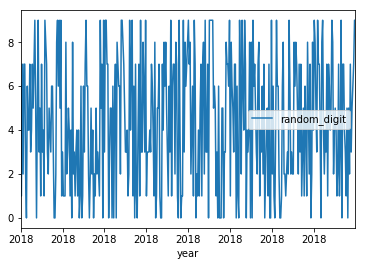

In [58]:
combined_data.plot(x='year', y='random_digit')

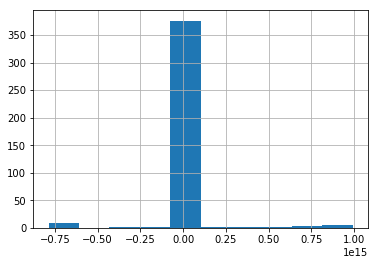

In [64]:
combined_data['pyfloat'].hist()

### End here -if time go to mosiqutos 

### Challenge - Write a Directory and Add Files to it

* Under `02-work` we have a number of files related to recent work we've been engaged in
* We want to move this to a directory for the current Year and month `yyyy-mm`
* Then we want to write a loop that moves those files into that directory prepended with the yyyy-mm-dd


In [64]:
!tree data/02-work/

data/02-work/
├── censuspopdata.xlsx
├── combinedminutes.pdf
├── demo.docx
├── dimensions.xlsx
├── duesRecords.xlsx
├── encrypted.pdf
├── encryptedminutes.pdf
├── example.csv
├── example.html
├── example.xlsx
├── freezeExample.xlsx
├── headings.docx
├── helloworld.docx
├── meetingminutes.pdf
├── meetingminutes2.pdf
├── merged.xlsx
├── multipleParagraphs.docx
├── produceSales.xlsx
├── restyled.docx
├── sampleChart.xlsx
├── styled.xlsx
├── styles.xlsx
├── twoPage.docx
├── updatedProduceSales.xlsx
└── watermark.pdf

0 directories, 25 files


In [65]:
import os

In [66]:
os.makedirs('/Users/timdennis/lessons/py-mass-useful/data/02-work/2018-04')

In [68]:
glob.glob('/Users/timdennis/lessons/py-mass-useful/data/02-work/*')

['/Users/timdennis/lessons/py-mass-useful/data/02-work/2018-04',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/censuspopdata.xlsx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/combinedminutes.pdf',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/demo.docx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/dimensions.xlsx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/duesRecords.xlsx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/encrypted.pdf',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/encryptedminutes.pdf',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/example.csv',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/example.html',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/example.xlsx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/freezeExample.xlsx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/headings.docx',
 '/Users/timdennis/lessons/py-mass-useful/data/02-work/hellowor

In [69]:
for file in glob.glob('data/02-work/*'):
    print(file)

data/02-work/2018-04
data/02-work/censuspopdata.xlsx
data/02-work/combinedminutes.pdf
data/02-work/demo.docx
data/02-work/dimensions.xlsx
data/02-work/duesRecords.xlsx
data/02-work/encrypted.pdf
data/02-work/encryptedminutes.pdf
data/02-work/example.csv
data/02-work/example.html
data/02-work/example.xlsx
data/02-work/freezeExample.xlsx
data/02-work/headings.docx
data/02-work/helloworld.docx
data/02-work/meetingminutes.pdf
data/02-work/meetingminutes2.pdf
data/02-work/merged.xlsx
data/02-work/multipleParagraphs.docx
data/02-work/produceSales.xlsx
data/02-work/restyled.docx
data/02-work/sampleChart.xlsx
data/02-work/styled.xlsx
data/02-work/styles.xlsx
data/02-work/twoPage.docx
data/02-work/updatedProduceSales.xlsx
data/02-work/watermark.pdf


http://pbpython.com/excel-file-combine.html
https://github.com/chris1610/pbpython

In [83]:
for file in glob.glob('data/02-work/*.*'):
    path = '/Users/timdennis/lessons/py-mass-useful/'
    file_parts = file.split('/')
    #print(file)
    shutil.copy(path + file, path+ 'data/2018-04/' + file_parts[2])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/timdennis/lessons/py-mass-useful/data/2018-04/censuspopdata.xlsx'

* word freq

https://programminghistorian.org/lessons/counting-frequencies